This notebook implements a Support Vector Machine (SVM) algorithm for the Digit Recognizer Kaggle competition found here: https://www.kaggle.com/c/digit-recognizer

Notebook by Jonathan Gomez Martinez

The beginning of this notebook was heavily guided by Charlie H.'s kernel found here https://www.kaggle.com/archaeocharlie/digit-recognizer/a-beginner-s-approach-to-classification/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
%matplotlib inline

First step in training is to get the data ready. We import the data, provided as a csv on Kaggle.

In [2]:
raw = pd.read_csv("train.csv")
#raw = raw.iloc[:10000,] #Remove the '#' at the beginning of the line to only use a subset of the data
length = len(raw)
print("We have", length, "digits, we will need to break these into training and testing sets")

We have 42000 digits, we will need to break these into training and testing sets


For testing purposes, we need to seperate the data set into training and testing sets.

In [3]:
test=raw.sample(frac=0.2,random_state=5181) #We are creating an 80/20 split, the proportion can be changed by changing the number after  'frac='
train=raw.drop(test.index)
l1 = len(train)
l2 = len(test)
print("Now we have", l1, "training digits and", l2, "testing digits")

Now we have 33600 training digits and 8400 testing digits


Next, we need to seperate the labels from the drawn digits so the algorithm will not "know the answer" without computing it

In [4]:
train_x = train.iloc[0:,1:]
train_y = train.iloc[0:,:1]
test_x = test.iloc[0:,1:]
test_y = test.iloc[0:,:1]

For convenience and to get a better understanding, the below code shows what the digits look like when restored from their flattened state.

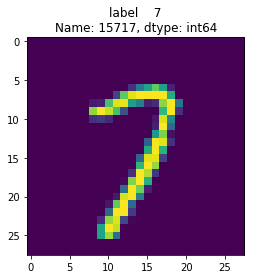

In [5]:
def showNum(row, x, y):
    i=row
    draw = x.iloc[i].as_matrix()
    a = draw.reshape((28,28))
    imgplot = plt.imshow(a)
    plt.title(y.iloc[i])
    
showNum(27, test_x, test_y)

Now we will build a simple SVM classifier using sklearn

In [6]:
clf = svm.SVC()
clf.fit(train_x, np.ravel(train_y))
clf.score(test_x, test_y)

0.11119047619047619

The classifier is sitting at about 10% accuracy. That's chance level. Printing the predictions shows that the algorithm is in fact simply guessing the same digit repeatedly.

In [7]:
clf.predict(test_x)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Since the data is still relatively "noisy" and a number can be determined regardless of color intensity, setting all colored cells to 1 and leaving all the others as 0 should lead to cleaner results

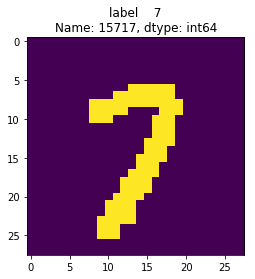

In [8]:
train_x[train_x>0]=1
test_x[test_x>0]=1
showNum(27, test_x, test_y)

We will now retrain with the simplified images and find significantly better results

In [9]:
clf2 = svm.SVC()
clf2.fit(train_x, np.ravel(train_y))
clf2.score(test_x, test_y)

0.94273809523809526

Since an SVM classifier looks at all attributes, regardless of actual value, removing attributes which carry no data could be useful.

In [10]:
a = train_x.sum(axis=0)
pixels = sum(train_x.sum(axis=0) == 0)
#77 Pixels are carrying no information.
print(pixels, "pixels carry no information")

77 pixels carry no information


In [11]:
a = pd.DataFrame(a)
a.columns = ["Use"]
a = a[a.Use == 0]
b = a.index.values
train_x.drop(b, axis=1, inplace = True) #Drop all of the columns with no values
test_x.drop(b, axis=1, inplace =True)

Now we will train another SVM classifier with the simplified images and removed attributes

In [12]:
clf3 = svm.SVC()
clf3.fit(train_x, np.ravel(train_y))
clf3.score(test_x, test_y)

0.94416666666666671

Slightly better, but tweaking some parameters may yield better results. Parameter explained well here: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

In [13]:
clf4 = svm.SVC( C = 1500)
clf4.fit(train_x, np.ravel(train_y))
clf4.score(test_x, test_y)
pred_y = clf4.predict(test_x)

Here we'll use the predictions to create a confusion matrix, telling us the predictions compared to the real labels on a heat map.

array([[842,   0,   1,   1,   0,   2,   4,   0,   3,   1],
       [  0, 928,   2,   1,   0,   0,   0,   1,   2,   0],
       [  2,   3, 829,   8,   4,   1,   2,   3,   6,   3],
       [  3,   2,   8, 817,   0,   4,   2,   6,   9,   8],
       [  2,   1,   4,   0, 793,   0,   4,   5,   0,  16],
       [  6,   1,   2,  11,   0, 705,   8,   0,   4,   0],
       [  8,   2,   1,   0,   4,   6, 800,   0,   1,   0],
       [  2,   2,   6,   3,   4,   0,   0, 824,   2,   7],
       [  5,   6,   6,   8,   4,   6,   5,   3, 758,   3],
       [  6,   1,   1,   5,  12,   2,   0,  12,   2, 813]])

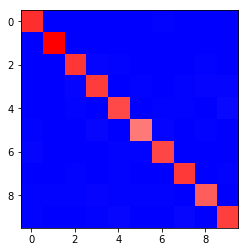

In [14]:
matrix = confusion_matrix(test_y, pred_y)
plt.imshow(matrix, interpolation='none', cmap = 'bwr')
matrix

In the confusion matrix above, the diagonal was too accurate and did not allow us to make much use of the rest of the graph. We will set the diagonal to zeros so we can better see the innaccurate results

array([[ 0,  0,  1,  1,  0,  2,  4,  0,  3,  1],
       [ 0,  0,  2,  1,  0,  0,  0,  1,  2,  0],
       [ 2,  3,  0,  8,  4,  1,  2,  3,  6,  3],
       [ 3,  2,  8,  0,  0,  4,  2,  6,  9,  8],
       [ 2,  1,  4,  0,  0,  0,  4,  5,  0, 16],
       [ 6,  1,  2, 11,  0,  0,  8,  0,  4,  0],
       [ 8,  2,  1,  0,  4,  6,  0,  0,  1,  0],
       [ 2,  2,  6,  3,  4,  0,  0,  0,  2,  7],
       [ 5,  6,  6,  8,  4,  6,  5,  3,  0,  3],
       [ 6,  1,  1,  5, 12,  2,  0, 12,  2,  0]])

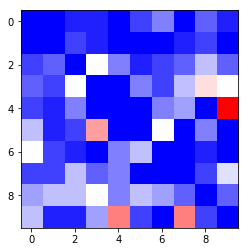

In [15]:
for i in range(10):
    matrix[i][i] = 0
plt.imshow(matrix, interpolation='none', cmap = 'bwr')
matrix

The below code would be used to create a submission. Change cell type to run

#Import and Clean Test Data
test = pd.read_csv("test.csv")
test[test>0]=1
test.drop(b, axis=1, inplace =True) #Drop all of the rows with no values in training

c = clf4.predict(test)
c

c = pd.DataFrame(c)

c.index.name='ImageId'
c.index+=1
c.columns=['Label']
c.to_csv('results.csv', header=True)